In [1]:
import numpy as np

a=0
b=1
deg=5
r, w =np.polynomial.legendre.leggauss(deg)
print("r",r)
print("w",w)
nw=w*(b-a)/2
nr=(b-a)/2*(r+1)
print("nw",nw)
print("nr",nr)
sum(nw)

r [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
w [ 0.23692689  0.47862867  0.56888889  0.47862867  0.23692689]
nw [ 0.11846344  0.23931434  0.28444444  0.23931434  0.11846344]
nr [ 0.04691008  0.23076534  0.5         0.76923466  0.95308992]


1.0

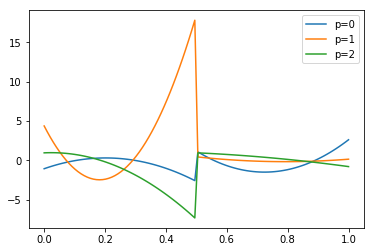

-1.3183898417423734e-16

In [34]:
import numpy as np
import matplotlib.pyplot as plt

import wavetools as wt

P=3
wv=wt.wavetools(P)
wv.genWVlets()
x=np.linspace(0,1,100)

for p in range(P):
    y=wv.fpsi(p,x)
    plt.plot(x,y,label='p='+str(p))
#ax.legend(arange(P))
plt.legend(loc='upper right')
plt.show()
(wv.fpsi(1,wv.roots)* wv.fpsi(1,wv.roots)) @ wv.weights
(wv.fpsi(2,wv.roots)* wv.roots**2 )@ wv.weights